# **FASE IV: MODELADO (NO-SUPERVISADO)**

In [1]:
# Librerías básicas

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import warnings #Advertencias
warnings.filterwarnings('ignore')

monopoly = pd.read_parquet('../monopoly_cleaned_parquet')

In [1]:
# Librerías básicas

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import warnings #Advertencias
warnings.filterwarnings('ignore')

import cupy, cudf

monopoly = cudf.read_parquet('../monopoly_cleaned_parquet')


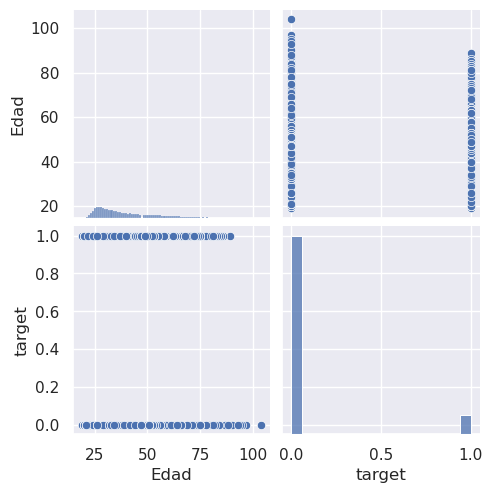

In [70]:
# Pair-plot
sns.set()
sns.pairplot(data=monopoly ,vars=["Edad", "target"])
plt.show()

Gráfico de dispersión de target y Edad, e histograma con frecuencia de edad y target. Al ser target una variable binaria, se acumulan las muestras en los valores 0 y 1 de target.

### **CLUSTERING JERÁRQUICO (usando el metodo BIRCH)**

In [79]:
monopoly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51121 entries, 0 to 51120
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Subsegmento     51121 non-null  float64
 1   Sexo            51121 non-null  float64
 2   Region          51121 non-null  float64
 3   Edad            51121 non-null  float64
 4   Renta           51121 non-null  float64
 5   Antiguedad      51121 non-null  float64
 6   Internauta      51121 non-null  float64
 7   Adicional       51121 non-null  float64
 8   Dualidad        51121 non-null  float64
 9   Monoproducto    51121 non-null  float64
 10  Ctacte          51121 non-null  float64
 11  Consumo         51121 non-null  float64
 12  Hipotecario     51121 non-null  float64
 13  Debito          51121 non-null  float64
 14  CambioPin       51121 non-null  float64
 15  Cuentas         51121 non-null  float64
 16  TC              51121 non-null  float64
 17  CUPO_L1         51121 non-null 

Columnas del dataset

In [2]:
#'Edad' y 'target'
X =monopoly.drop(monopoly.target)

In [11]:
from sklearn.model_selection import train_test_split
X1,X2= train_test_split(X.to_numpy(), test_size=None, train_size=0.5)

In [12]:
X1.shape

(25559, 66)

Se define la variable X a partir de Edad y Target.

In [13]:
from scipy.cluster.hierarchy import linkage

# Matriz de enlace
linkage_matrix = linkage(X1, method='ward')

Generación de la matriz de alcance.

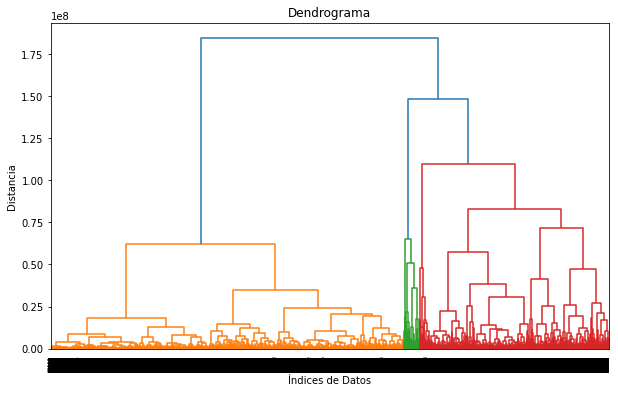

In [15]:
from scipy.cluster.hierarchy import dendrogram

#Dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, p=20) #grafico de dendrograma
plt.title('Dendrograma')
plt.xlabel('Índices de Datos')
plt.ylabel('Distancia')
plt.show()

A partir del dendograma, se usaran 4 clusters

#### **Modelo N°1**

In [17]:
from cuml import AgglomerativeClustering

cj_1 = AgglomerativeClustering(affinity='euclidean' ,n_clusters=4)

Se genera un modelo a partir de una algorimo jerarárquico aglomerativo de clustering. Se buscan 4 clusters, se usa la distancia euclidiana para medir la distancia entre las muestras de cada feature y como distancia mínima entre conjuntos observados.

In [18]:
Y_hat = cj_1.fit_predict(X)

Se ajusta el modelo a $X$ y genera la predicción $\hat{Y}$

In [23]:
from sklearn.metrics import silhouette_score

SScj_1 = silhouette_score(X.to_numpy(), Y_hat.to_numpy(), metric='euclidean')


print("Silhouette Score:", SScj_1)

Silhouette Score: 0.8568335952535182


#### **Modelo N°2**

In [33]:
from sklearn.decomposition import PCA

# Aplica PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X.to_numpy())

In [34]:

cj_2 = AgglomerativeClustering(affinity='euclidean', connectivity="knn", n_clusters=4)
Y_hat = cj_2.fit_predict(X_PCA)

In [37]:
SScj_2 = silhouette_score(X_PCA, Y_hat, metric='euclidean')

print("Silhouette Score:", SScj_2)

Silhouette Score: 0.8987739881749655


#### **Modelo N°3**

In [79]:
from sklearn.decomposition import PCA

# Aplica PCA para reducir la dimensionalidad
pca = PCA(n_components=3)
X_PCA = pca.fit_transform(X.to_numpy())

In [80]:
# Aplicar clustering jerárquico aglomerativo
cj_3 = AgglomerativeClustering(affinity='euclidean', connectivity="knn", n_clusters=4)
Y_hat = cj_3.fit_predict(X_PCA)

In [81]:
SScj_3 = silhouette_score(X_PCA, Y_hat)

print("Silhouette Score:", SScj_3)

Silhouette Score: 0.9106057629549298


In [82]:
unique_values, counts = np.unique(Y_hat, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{value}: {count} ")

0: 51116 
1: 1 
2: 1 
3: 1 


El modelo si bien tiene un puntaje de Silhuette algo, clasifica casi todos los valores en un único cluster.

In [88]:
tabla = {'CJ1':SScj_1, 'CJ2':SScj_2, 'CJ3':SScj_3}
print(tabla)


{'CJ1': 0.8568335952535182, 'CJ2': 0.8987739881749655, 'CJ3': 0.9106057629549298}
